# 1. Initialize Environment

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install tensorflow
#!pip install matplotlib

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from sklearn.preprocessing import MinMaxScaler #import MinMaxScaler class from sklearn.preprocessing module

# Importing the Keras libraries and packages
from keras.models import Sequential  # to build sequential layers 
from keras.layers import Dense       # to build dense output layer 
from keras.layers import LSTM        # to build LSTM
from keras.layers import Dropout     # to apply Dropout regularization

# 2. Data Preprocessing

In [4]:
train = pd.read_csv('data/Google_Stock_Price_Train.csv') # import the data set
train.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# select the column which is interesting to see the trend in it and create a numpy array out of it 
train = train.iloc[:, 1:2].values 
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))             # all the new stock prices will be between 0 and 1

# apply the normalizer on the  training data set and create an scaled dataset
train = sc.fit_transform(train)  

In [7]:
# Creating a data structure with 60 timesteps and 1 output
# this means that at each day it is going to look at the 60 days before to predict the next day. 
# it means that it would be 60 timesteps and one output (stock price) at time T+1


# two empty lists are created to store the training data
X_train = []
y_train = []

#create a loop
# for each observation X_train will have 60 stcok prices from 60 days before 
# and y_train would be the stock price of the next day
for i in range(60, 1258):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    
#use the array function of Numpy to create array from X_train and y_train
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping
# to add dimension to data set we can use Reshape function 
# this is because we need to have the input in shape of 3D array with shape
# (batch_size/number of Observations, timesteps, input_dim/number of indicators)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 3. Model Engineering (LSTM)

In [19]:
### 1st Model
model = Sequential() 

model.add(LSTM(units = 64,return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(LSTM(units = 64,return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(LSTM(units = 64,return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(LSTM(units = 64,return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(LSTM(units = 64,return_sequences = True, input_shape = (X_train.shape[1], 1)))

model.add(LSTM(units = 64))

model.add(Dense(units = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 64)            16896     
                                                                 
 lstm_11 (LSTM)              (None, 60, 64)            33024     
                                                                 
 lstm_12 (LSTM)              (None, 60, 64)            33024     
                                                                 
 lstm_13 (LSTM)              (None, 60, 64)            33024     
                                                                 
 lstm_14 (LSTM)              (None, 60, 64)            33024     
                                                                 
 lstm_15 (LSTM)              (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 30, batch_size = 8)

Epoch 1/30
150/150 [==============================] - 25s 104ms/step - loss: 0.0150
Epoch 2/30
150/150 [==============================] - 14s 90ms/step - loss: 0.0045
Epoch 3/30
150/150 [==============================] - 13s 85ms/step - loss: 0.0038
Epoch 4/30
150/150 [==============================] - 13s 84ms/step - loss: 0.0030
Epoch 5/30
150/150 [==============================] - 13s 85ms/step - loss: 0.0024
Epoch 6/30
150/150 [==============================] - 13s 88ms/step - loss: 0.0023
Epoch 7/30
150/150 [==============================] - 13s 89ms/step - loss: 0.0023
Epoch 8/30
150/150 [==============================] - 14s 90ms/step - loss: 0.0023
Epoch 9/30
150/150 [==============================] - 13s 88ms/step - loss: 0.0019
Epoch 10/30
150/150 [==============================] - 14s 90ms/step - loss: 0.0018
Epoch 11/30
150/150 [==============================] - 13s 88ms/step - loss: 0.0015
Epoch 12/30
150/150 [==============================] - 13s 89ms/step - loss: 0.0015


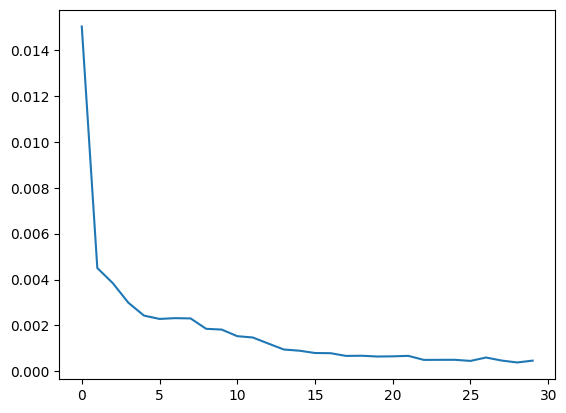

In [21]:
loss_per_epoch = model.history.history["loss"]

plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

# 4. Predicting Stock Prices

In [22]:
# Getting the REAL stock price of 2017 from test dataset
# test dataset are the real values fromn the google stock price 
test = pd.read_csv('data/Google_Stock_Price_Test.csv')
test = test.iloc[:, 1:2].values

test = sc.fit_transform(test) 

y_test = test

In [23]:
# concatenate train and test to get the full timeline of stock prices
total_data = np.concatenate((train, test), axis = 0)

# the next line takes stock prices before 60 days in account for each test data 
test = total_data[- (len(test)+60):]
test = test.reshape(-1,1)

In [24]:
#the same steps we have done in training, will be done here in predicting as swell
X_test = []

# keep in mind that test dataset has just 20 financial days
for i in range(60, 80):
    X_test.append(test[i-60:i, 0])
X_test = np.array(X_test)

In [25]:
# create the 3d format as we have done in trainging part
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
# predicting will be done here 
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


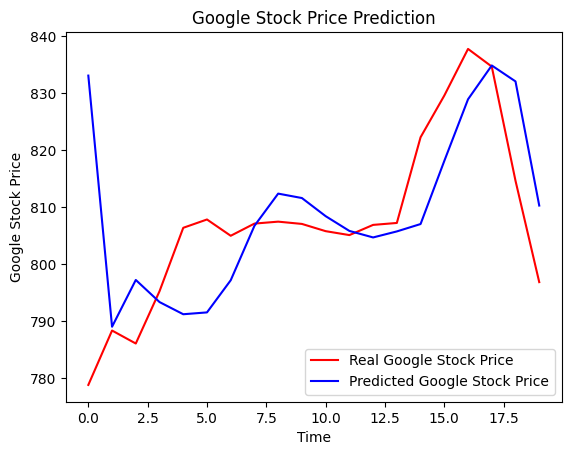

In [27]:
# Visualising the results
plt.plot(sc.inverse_transform(y_test), color = 'red', label = 'Real Google Stock Price')
plt.plot(sc.inverse_transform(y_pred), color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()